In [ ]:

# notebook desechable para probar plots


In [28]:
import pandas as pd
import numpy as np


### creando datos artificiales para jugar con graficos



# Configuración del dataset
np.random.seed(42)
n_days_historical = 60  # Días históricos
n_days_forecast = 20  # Días proyectados
n_assets = 5  # Número de acciones

# Crear proporciones iniciales de cada activo (asegurando que sumen 100%)
initial_distribution = np.random.dirichlet(np.ones(n_assets), size=1).flatten() * 100

# Crear fluctuaciones interdependientes
historical_data = [initial_distribution]
for day in range(1, n_days_historical):
    # Copiar las proporciones del día anterior
    prev_day = historical_data[-1].copy()
    
    # Generar cambios aleatorios interdependientes
    changes = np.random.normal(0, 1, n_assets)
    for i in range(n_assets):
        change = changes[i]
        prev_day[i] += change  # Ajustar la proporción de una acción
        if change < 0:  # Si una acción baja, distribuir ese valor entre las otras
            distribution = -change * np.random.dirichlet(np.ones(n_assets - 1))
            prev_day += np.insert(distribution, i, 0)
    
    # Normalizar para que sumen 100%
    prev_day = np.clip(prev_day, 0, None)  # Asegurar valores positivos
    prev_day = prev_day / prev_day.sum() * 100
    historical_data.append(prev_day)

# Convertir los datos históricos en un DataFrame
historical_data = np.array(historical_data)
forecast_data = []  # Para proyecciones futuras

# Generar proyecciones futuras similares
last_day = historical_data[-1].copy()
for _ in range(n_days_forecast):
    # Generar cambios menores para las proyecciones
    changes = np.random.normal(0, 0.5, n_assets)
    last_day += changes
    last_day = np.clip(last_day, 0, None)  # Evitar valores negativos
    last_day = last_day / last_day.sum() * 100
    forecast_data.append(last_day.copy())

# Combinar datos históricos y proyecciones
all_data = np.vstack((historical_data, forecast_data))

# Crear el DataFrame
days = np.arange(1, n_days_historical + n_days_forecast + 1)
data = {f"Acción {i+1}": all_data[:, i] for i in range(n_assets)}
data["Días"] = days
df = pd.DataFrame(data)

# Reordenar columnas
df = df[["Días"] + [f"Acción {i+1}" for i in range(n_assets)]]




In [29]:
df

,Días,Acción 1,Acción 2,Acción 3,Acción 4,Acción 5
0,1,7.982511,51.203839,22.398576,15.529660,2.885413
1,2,8.627016,51.826267,21.811980,15.039166,2.695571
2,3,7.939499,51.526037,21.753366,14.914016,3.867081
3,4,8.599622,51.651284,21.259410,13.539938,4.949746
4,5,7.817632,50.668675,21.565237,14.022069,5.926387
...,...,...,...,...,...,...
75,76,9.894138,31.552503,17.752540,23.041987,17.758832
76,77,10.214788,31.211845,17.148084,22.973890,18.451394
77,78,10.327751,31.614979,17.080217,23.035358,17.941696
78,79,9.851465,31.486919,17.649799,23.253237,17.758580


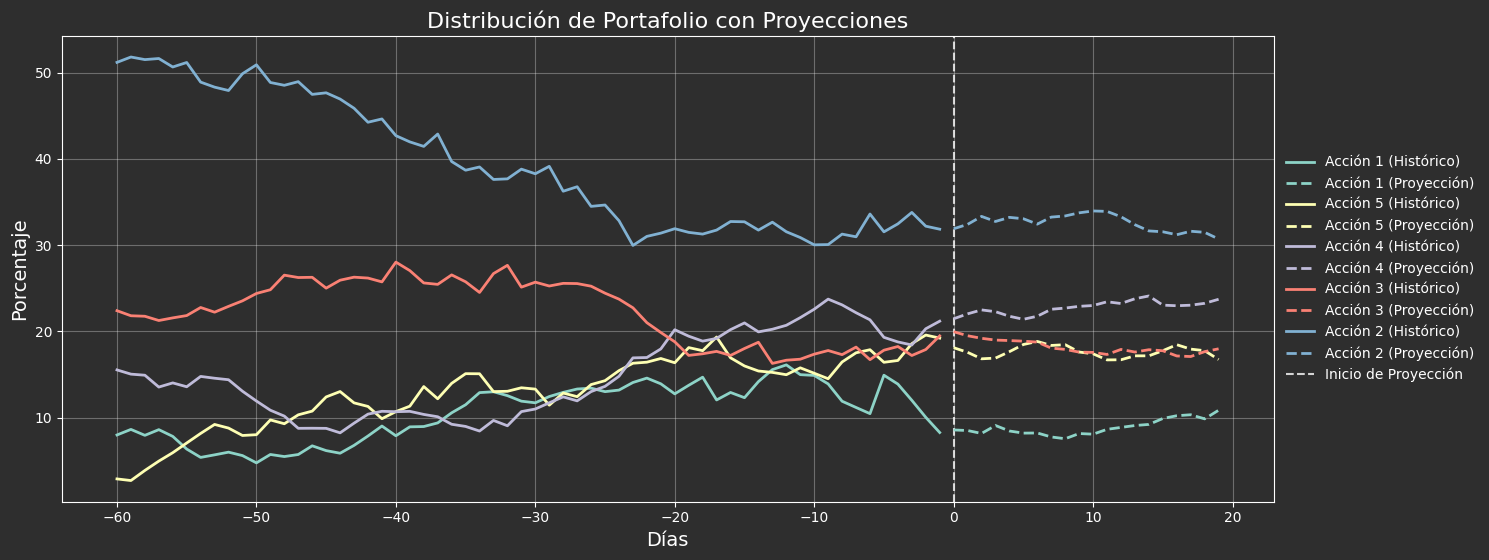

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Definir el punto de proyección
projection_point = 60

# Crear el gráfico
plt.figure(figsize=(15, 6))

# Ajustar los días para que los históricos sean negativos y las proyecciones positivas
df["Días"] = np.arange(-n_days_historical, n_days_forecast)

# Punto donde comienza la proyección
projection_point = 0  # El cambio ocurre en el día 0 ahora

# Obtener el ciclo de colores predefinido en Matplotlib
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Graficar cada acción
for i, column in enumerate(df.columns[1:]):
    color = color_cycle[i % len(color_cycle)]  # Usar colores cíclicos del ciclo predefinido

    # Datos históricos (línea sólida)
    plt.plot(
        df["Días"][:n_days_historical],
        df[column][:n_days_historical],
        label=f"{column} (Histórico)",
        linewidth=2,
        zorder=3,
        color=color
    )
    # Datos proyectados (línea punteada)
    plt.plot(
        df["Días"][n_days_historical:],
        df[column][n_days_historical:],
        linestyle="--",
        linewidth=2,
        zorder=3,
        label=f"{column} (Proyección)",
        color=color
    )

# Añadir una línea vertical para indicar el inicio de la proyección
plt.axvline(
    x=projection_point,
    color="white",
    linestyle="--",
    linewidth=1.5,
    alpha=0.8,
    zorder=2,
    label="Inicio de Proyección"
)

# Personalización del gráfico
plt.title("Distribución de Portafolio con Proyecciones", fontsize=16)
plt.xlabel("Días", fontsize=14)
plt.ylabel("Porcentaje", fontsize=14)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False,)  # Ajusta la posición

#plt.grid(alpha=0.3, color="white")  # Cambiar el color
plt.grid(alpha=0.3)

plt.gca().set_facecolor('#2e2e2e')  # Gris oscuro para el fondo del área del gráfico
plt.gcf().set_facecolor('#2e2e2e')  # Gris oscuro para el fondo de la figura completa

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar márgenes para dar espacio a la leyenda


plt.show()





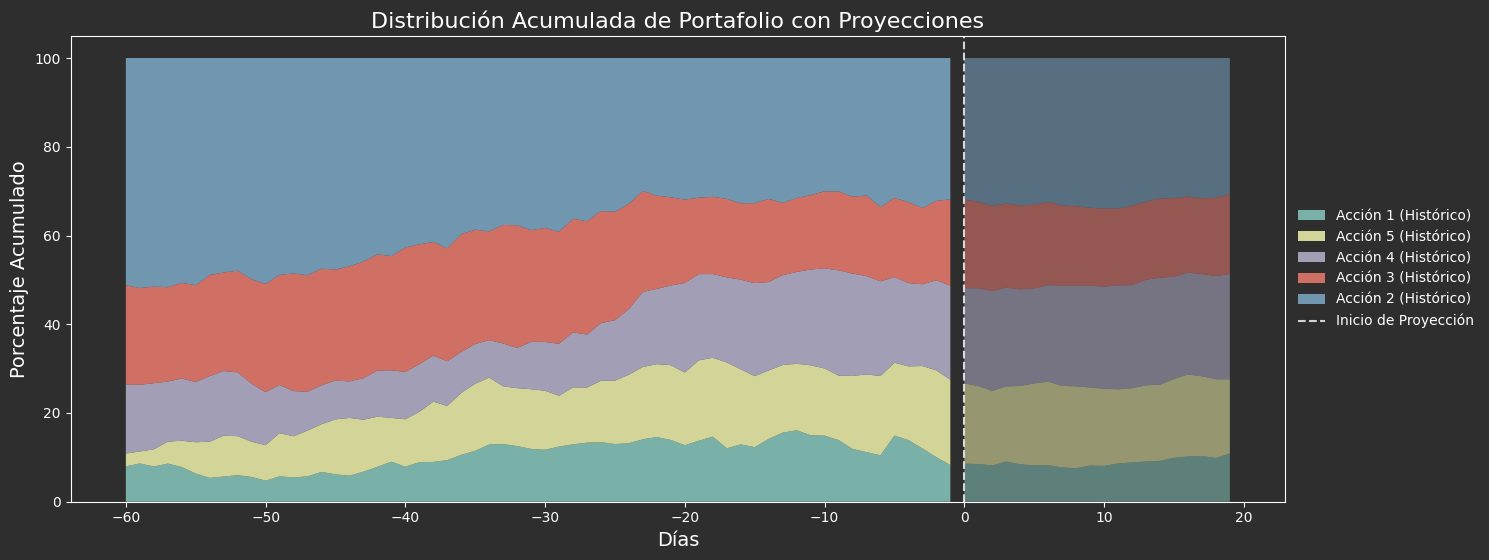

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ajustar los días para que los históricos sean negativos y las proyecciones positivas
df["Días"] = np.arange(-n_days_historical, n_days_forecast)

# Ordenar las columnas por el valor inicial para que las menores contribuciones estén abajo
column_order = df.iloc[:n_days_historical, 1:].sum().sort_values().index
df = df[["Días"] + list(column_order)]

# Crear el gráfico
plt.figure(figsize=(15, 6))

# Separar días históricos y proyectados
days_historical = df["Días"][:n_days_historical]
days_projection = df["Días"][n_days_historical:]

# Datos para gráficos apilados
historical_values = df.iloc[:n_days_historical, 1:].values.T
projection_values = df.iloc[n_days_historical:, 1:].values.T

# Colores
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Gráfico apilado para datos históricos
plt.stackplot(
    days_historical,
    historical_values,
    labels=[f"{col} (Histórico)" for col in df.columns[1:]],
    colors=color_cycle[:len(df.columns[1:])],
    alpha=0.8
)

# Gráfico apilado para datos proyectados (líneas punteadas para diferenciarlos)
plt.stackplot(
    days_projection,
    projection_values,
    colors=color_cycle[:len(df.columns[1:])],
    alpha=0.5,
    linestyle='--'
)

# Añadir una línea vertical para indicar el inicio de la proyección
plt.axvline(
    x=0,
    color="white",
    linestyle="--",
    linewidth=1.5,
    alpha=0.8,
    zorder=2,
    label="Inicio de Proyección"
)

# Personalización del gráfico
plt.title("Distribución Acumulada de Portafolio con Proyecciones", fontsize=16)
plt.xlabel("Días", fontsize=14)
plt.ylabel("Porcentaje Acumulado", fontsize=14)

# Leyenda ajustada fuera del gráfico
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize=10
)

# Colores de fondo
plt.gca().set_facecolor('#2e2e2e')  # Gris oscuro para el fondo del área del gráfico
plt.gcf().set_facecolor('#2e2e2e')  # Gris oscuro para el fondo de la figura completa

# Ajustar márgenes
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()
